<a href="https://colab.research.google.com/github/Yasir-Mohi-ud-din/Stress_Scan/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [ ]:
data=pd.read_csv('/content/stress_dataset.csv')

In [ ]:
data.head()

,text,label,confidence
0,"He said he had not felt that way before, sugge...",1,0.8
1,"Hey there r/assistance, Not sure if this is th...",0,1.0
2,My mom then hit me with the newspaper and it s...,1,0.8
3,"until i met my new boyfriend, he is amazing, h...",1,0.6
4,October is Domestic Violence Awareness Month a...,1,0.8


In [ ]:
data.columns

Index(['text', 'label', 'confidence'], dtype='object')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        2838 non-null   object 
 1   label       2838 non-null   int64  
 2   confidence  2838 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 66.6+ KB
None


In [ ]:
print(data.isna().sum())

text          0
label         0
confidence    0
dtype: int64


In [ ]:
data.describe()

,label,confidence
count,2838.000000,2838.000000
mean,0.524313,0.808972
std,0.499497,0.177038
min,0.000000,0.428571
25%,0.000000,0.600000
50%,1.000000,0.800000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
# Split the data into features and target label
X = data['text']
y = data['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text feature
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train)
X_test_text = vectorizer.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_text, y_train)
# Perform cross-validation
cv_scores = cross_val_score(model, X_train_text, y_train, cv=5, scoring='accuracy')
# Predictions
y_pred = model.predict(X_test_text)



In [ ]:
from sklearn.metrics import log_loss

# Get predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test_text)

# Calculate binary cross-entropy
binary_cross_entropy = log_loss(y_test, y_pred_proba)

print("Binary Cross-Entropy:", binary_cross_entropy)


Binary Cross-Entropy: 0.5258134594933845


In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC ROC:", roc_auc_score(y_test, model.predict_proba(X_test_text)[:, 1]))

Accuracy: 0.7359154929577465
Precision: 0.739938080495356
Recall: 0.7836065573770492
F1 Score: 0.7611464968152866
AUC ROC: 0.8248332606121048


Training Accuracy: 0.8845814977973568


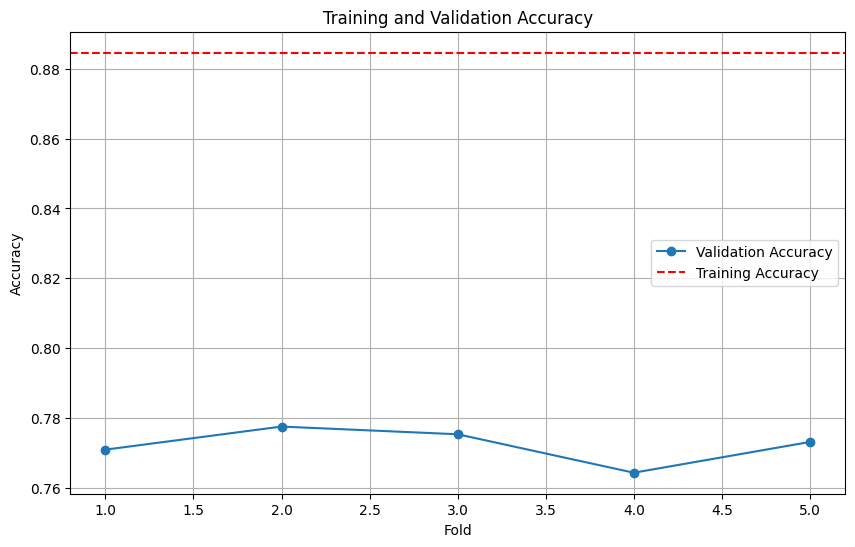

In [ ]:
train_accuracy = model.score(X_train_text, y_train)
print("Training Accuracy:", train_accuracy)
# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), cv_scores, marker='o', linestyle='-', label='Validation Accuracy')
plt.axhline(y=train_accuracy, color='r', linestyle='--', label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

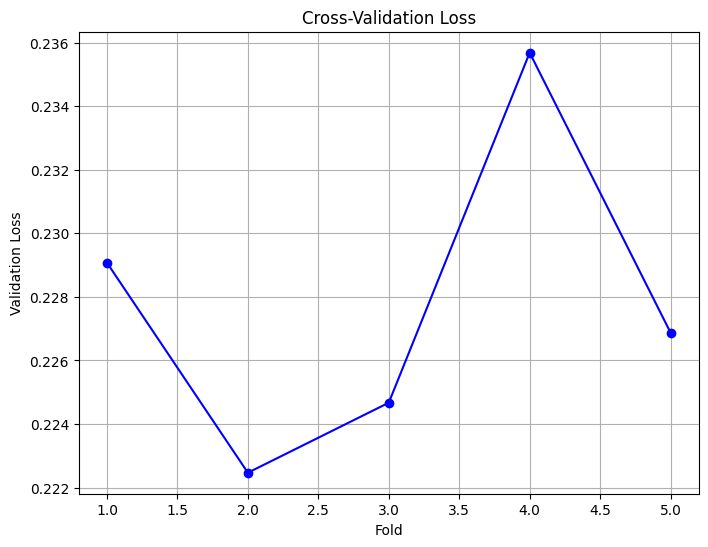

In [ ]:
# Plot the loss graph
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), 1 - cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_text, y_train)

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_model, X_train_text, y_train, cv=5, scoring='accuracy')

# Predictions
y_pred_nb = nb_model.predict(X_test_text)


In [ ]:
# Evaluation
print("Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_nb))
print("Precision (Naive Bayes):", precision_score(y_test, y_pred_nb))
print("Recall (Naive Bayes):", recall_score(y_test, y_pred_nb))
print("F1 Score (Naive Bayes):", f1_score(y_test, y_pred_nb))
print("AUC ROC (Naive Bayes):", roc_auc_score(y_test, nb_model.predict_proba(X_test_text)[:, 1]))
train_accuracy_nb = nb_model.score(X_train_text, y_train)
print("Training Accuracy (Naive Bayes):", train_accuracy_nb)

Accuracy (Naive Bayes): 0.6919014084507042
Precision (Naive Bayes): 0.6419213973799127
Recall (Naive Bayes): 0.9639344262295082
F1 Score (Naive Bayes): 0.7706422018348624
AUC ROC (Naive Bayes): 0.836713831577635
Training Accuracy (Naive Bayes): 0.8273127753303965


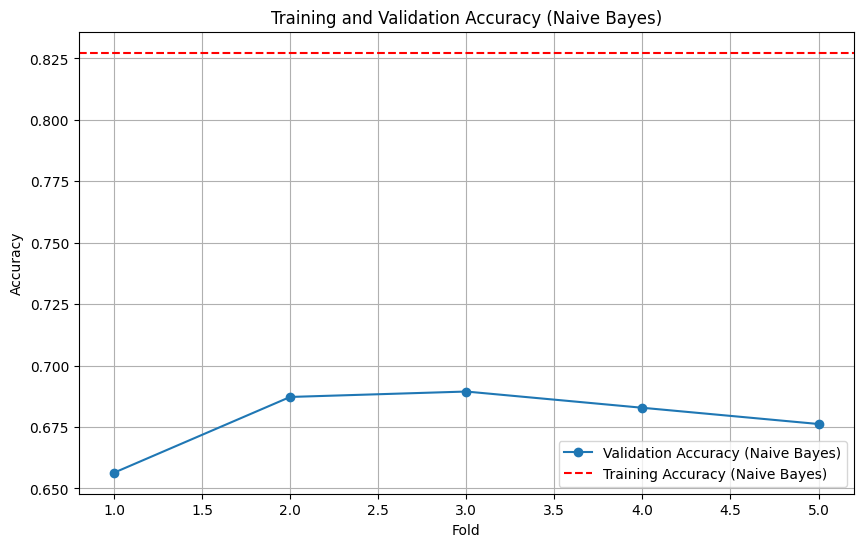

In [ ]:
# Plotting training and validation accuracy for Naive Bayes
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), cv_scores_nb, marker='o', linestyle='-', label='Validation Accuracy (Naive Bayes)')
plt.axhline(y=train_accuracy_nb, color='r', linestyle='--', label='Training Accuracy (Naive Bayes)')
plt.title('Training and Validation Accuracy (Naive Bayes)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

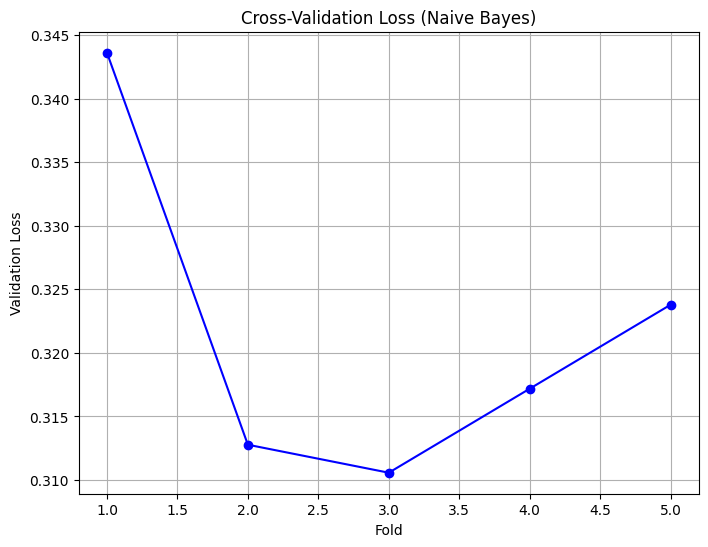

In [ ]:
# Plot the loss graph for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), 1 - cv_scores_nb, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Loss (Naive Bayes)')
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.show()

KNN Algorithm


In [ ]:
# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_text, y_train)

# Training accuracy
train_accuracy_knn = knn_model.score(X_train_text, y_train)

# Perform cross-validation
cv_scores_knn = cross_val_score(knn_model, X_train_text, y_train, cv=5, scoring='accuracy')

# Predictions
y_pred_knn = knn_model.predict(X_test_text)

In [ ]:
# Evaluation
print("Accuracy (KNN):", accuracy_score(y_test, y_pred_knn))
print("Precision (KNN):", precision_score(y_test, y_pred_knn))
print("Recall (KNN):", recall_score(y_test, y_pred_knn))
print("F1 Score (KNN):", f1_score(y_test, y_pred_knn))


Accuracy (KNN): 0.676056338028169
Precision (KNN): 0.6694677871148459
Recall (KNN): 0.7836065573770492
F1 Score (KNN): 0.7220543806646527


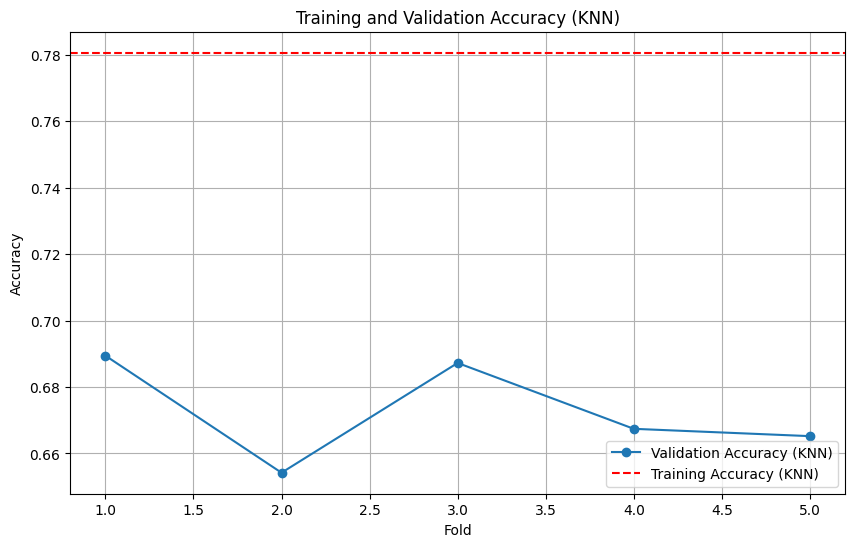

In [ ]:
# Plotting training and validation accuracy for KNN
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), cv_scores_knn, marker='o', linestyle='-', label='Validation Accuracy (KNN)')
plt.axhline(y=train_accuracy_knn, color='r', linestyle='--', label='Training Accuracy (KNN)')
plt.title('Training and Validation Accuracy (KNN)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

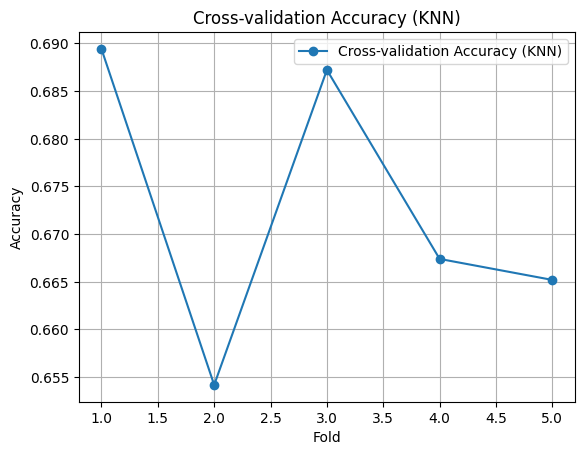

In [ ]:
# Plot cross-validation accuracy
plt.plot(np.arange(1, 6), cv_scores_knn, marker='o', linestyle='-', label='Cross-validation Accuracy (KNN)')

# Add labels and grid
plt.title('Cross-validation Accuracy (KNN)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Decison Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_text, y_train)

# Training accuracy
train_accuracy_dt = dt_model.score(X_train_text, y_train)

# Perform cross-validation
cv_scores_dt = cross_val_score(dt_model, X_train_text, y_train, cv=5, scoring='accuracy')

# Predictions
y_pred_dt = dt_model.predict(X_test_text)

In [ ]:
# Evaluation
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("Precision (Decision Tree):", precision_score(y_test, y_pred_dt))
print("Recall (Decision Tree):", recall_score(y_test, y_pred_dt))
print("F1 Score (Decision Tree):", f1_score(y_test, y_pred_dt))

Accuracy (Decision Tree): 0.6073943661971831
Precision (Decision Tree): 0.6339869281045751
Recall (Decision Tree): 0.6360655737704918
F1 Score (Decision Tree): 0.6350245499181669


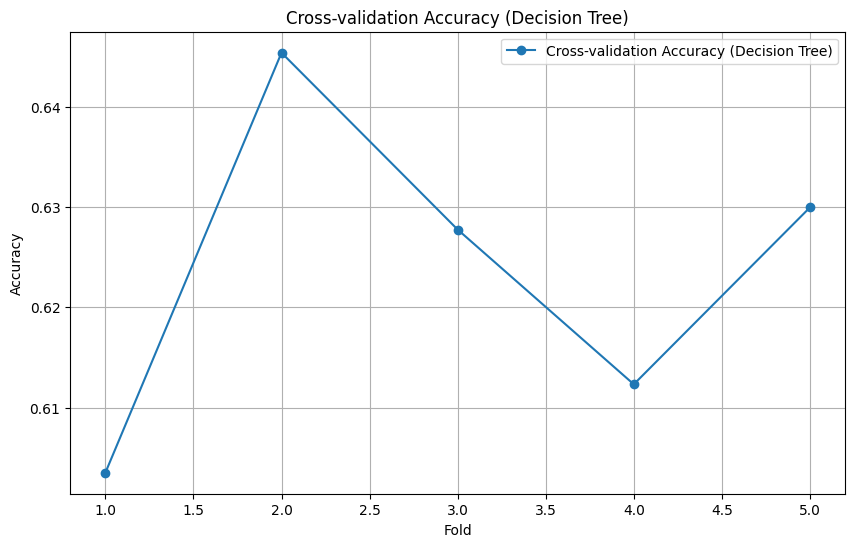

In [ ]:
# Plotting training and validation accuracy for Decision Tree
plt.figure(figsize=(10, 6))

# Plot cross-validation accuracy
plt.plot(np.arange(1, 6), cv_scores_dt, marker='o', linestyle='-', label='Cross-validation Accuracy (Decision Tree)')

# Add labels and grid
plt.title('Cross-validation Accuracy (Decision Tree)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Random forest


Accuracy (Random Forest): 0.7165492957746479
Precision (Random Forest): 0.7011173184357542
Recall (Random Forest): 0.8229508196721311
F1 Score (Random Forest): 0.7571644042232277


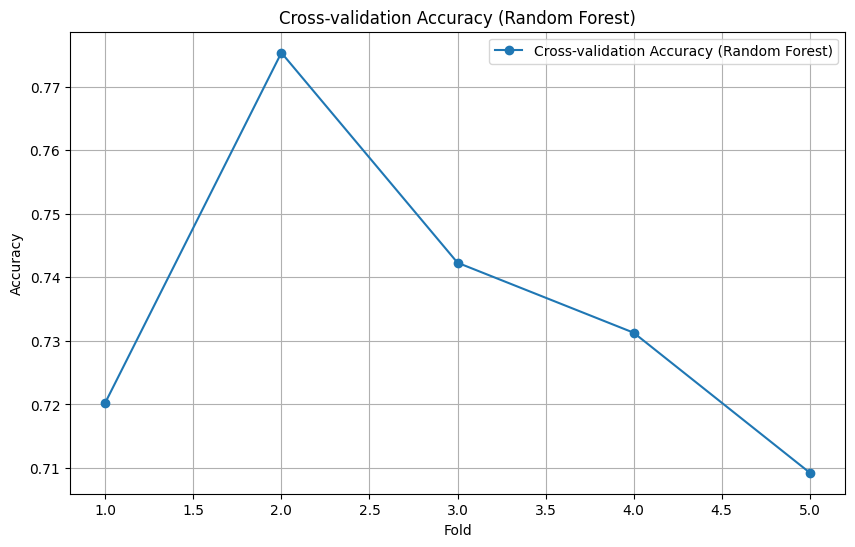

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_text, y_train)

# Perform cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_text, y_train, cv=5, scoring='accuracy')

# Predictions
y_pred_rf = rf_model.predict(X_test_text)

# Evaluation
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Precision (Random Forest):", precision_score(y_test, y_pred_rf))
print("Recall (Random Forest):", recall_score(y_test, y_pred_rf))
print("F1 Score (Random Forest):", f1_score(y_test, y_pred_rf))

# Plotting training and validation accuracy for Random Forest
plt.figure(figsize=(10, 6))

# Plot cross-validation accuracy
plt.plot(np.arange(1, 6), cv_scores_rf, marker='o', linestyle='-', label='Cross-validation Accuracy (Random Forest)')

# Add labels and grid
plt.title('Cross-validation Accuracy (Random Forest)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


  Support Vector Machine
  

In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC()  # Initialize SVM model
svm_model.fit(X_train_text, y_train)  # Fit the model to the training data

# Perform cross-validation
cv_scores_svm = cross_val_score(svm_model, X_train_text, y_train, cv=5, scoring='accuracy')

# Predictions
y_pred_svm = svm_model.predict(X_test_text)

# Evaluation
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("Precision (SVM):", precision_score(y_test, y_pred_svm))
print("Recall (SVM):", recall_score(y_test, y_pred_svm))
print("F1 Score (SVM):", f1_score(y_test, y_pred_svm))

Accuracy (SVM): 0.7376760563380281
Precision (SVM): 0.7468354430379747
Recall (SVM): 0.7737704918032787
F1 Score (SVM): 0.7600644122383252


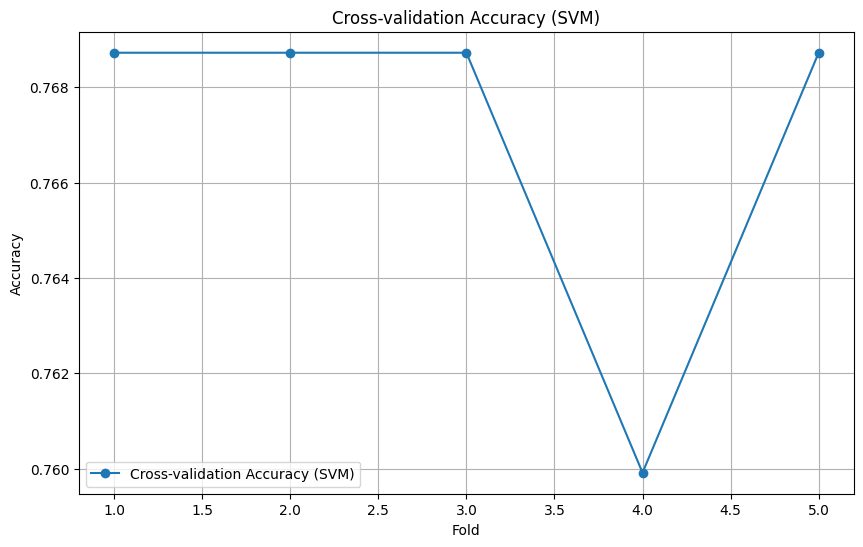

In [ ]:
# Plotting training and validation accuracy for SVM
plt.figure(figsize=(10, 6))

# Plot cross-validation accuracy
plt.plot(np.arange(1, 6), cv_scores_svm, marker='o', linestyle='-', label='Cross-validation Accuracy (SVM)')

# Add labels and grid
plt.title('Cross-validation Accuracy (SVM)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()